# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['dinner'] = (tips['time'] == 'Dinner')
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,True
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,True
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,True
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,True
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,True
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,True
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,True


In [3]:
# 1
y, x = patsy.dmatrices('tip ~ sex + smoker + C(dinner) + net_bill', tips)

In [4]:
# 2
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 07 May 2025   Prob (F-statistic):           2.64e-20
Time:                        09:13:29   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]        -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]          0.1405      0.151      0.932      0.352      -0.156       0.437
C(dinner)[T.True]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill              0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# removal of non-significant variables

y, x = patsy.dmatrices('tip ~ smoker + net_bill', tips)

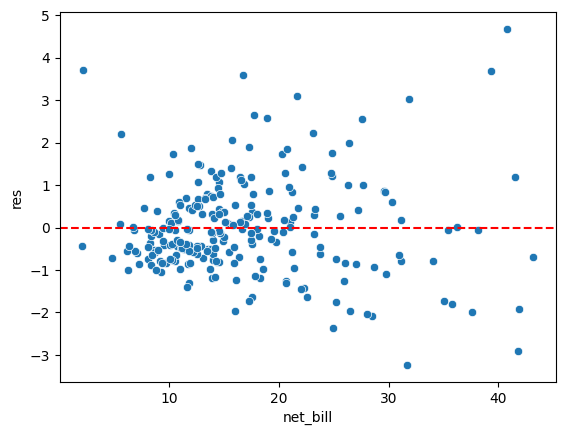

In [58]:
# 3
new_model = sm.OLS(y, x).fit()
tips['res'] = new_model.resid

sns.scatterplot(x = 'net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [43]:
# 4

model_log = smf.ols('tip ~ smoker + np.log(net_bill)',
                    data=tips).fit()
tips['model_log'] = model_log.resid

model_pol = smf.ols('tip ~ smoker + np.power(net_bill,2)',
                    data=tips).fit()
tips['model_pol'] = model_pol.resid

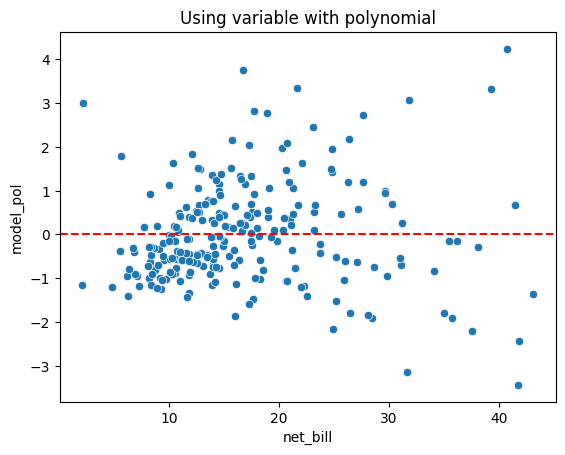

In [39]:
sns.scatterplot(x = 'net_bill', y='model_pol', data=tips)
plt.title('Using variable with polynomial') 
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

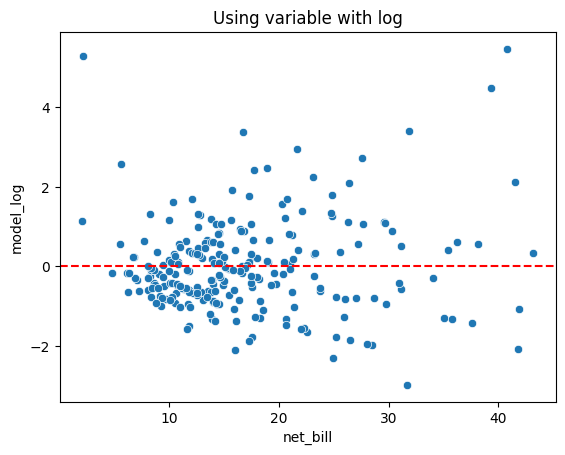

In [41]:
sns.scatterplot(x = 'net_bill', y='model_log', data=tips)
plt.title('Using variable with log') 
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Polynomial VS Log

It seems to me that the best model is with polynomial. In addition to improving R2, in the graph we notice a slight improvement in the arrangement of the data.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [74]:
# 1

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + C(dinner) + net_bill', tips)

In [76]:
# 2

model_2 = sm.OLS(y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.21e-18
Time:                        09:40:16   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]         0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]          0.0436      0.048      0.903      0.367      -0.052       0.139
C(dinner)[T.True]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill              0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# removal of non-significant variables.

y, X = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)

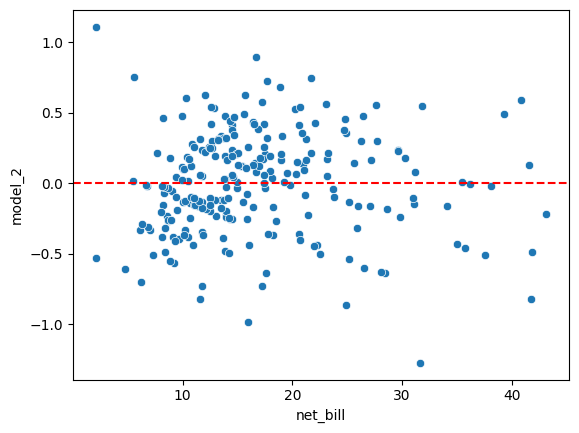

In [80]:
# 3
model_2 = sm.OLS(y, X).fit()
tips['model_2'] = model_2.resid

sns.scatterplot(x='net_bill', y='model_2', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [88]:
model_log_1 = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)',
                      data=tips).fit()
tips['model_log_1'] = model_log_1.resid

model_pol_1 = smf.ols('np.log(tip) ~ smoker + np.power(net_bill,2)',
                      data=tips).fit()
tips['model_pol_1'] = model_pol_1.resid

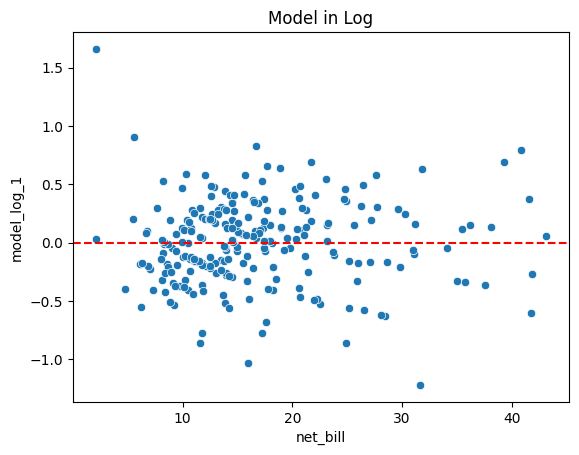

In [92]:
sns.scatterplot(x='net_bill', y='model_log_1', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Model in Log')
plt.show()

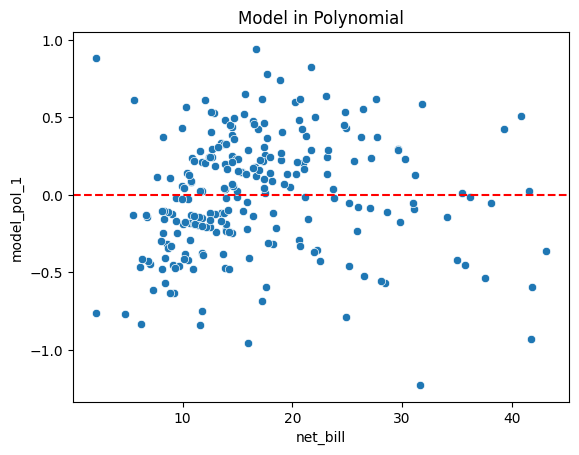

In [94]:
sns.scatterplot(x='net_bill', y='model_pol_1', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Model in Polynomial')
plt.show()

In [ ]:
# Do modelo final deste item, calcule o R2 na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

model_log_1 = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)',
                      data=tips).fit()
tips['model_log_1'] = model_log_1.resid

In [108]:
tips['model_without_log'] = np.exp(model_log_1.fittedvalues)
a = tips[['model_without_log','tip']].corr().iloc[0,1]**2

tips['model_2_r2'] = model_2.fittedvalues
b = tips[['model_2_r2','tip']].corr().iloc[0,1]**2


print(f'The r2 of model without log its {a} and with log its {b}.')
print('We can conclude that the better r2 is your model_2.')

The r2 of model without log its 0.3315613309568855 and with log its 0.3348906981124006.
We can conclude that the better r2 is your model_2.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis|
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [185]:
renda_csv = pd.read_csv(r'\Users\Meu Computador\anaconda3\@ EBAC\Módulo 10 - Descritiva II\previsao_de_renda.csv')
renda_csv.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

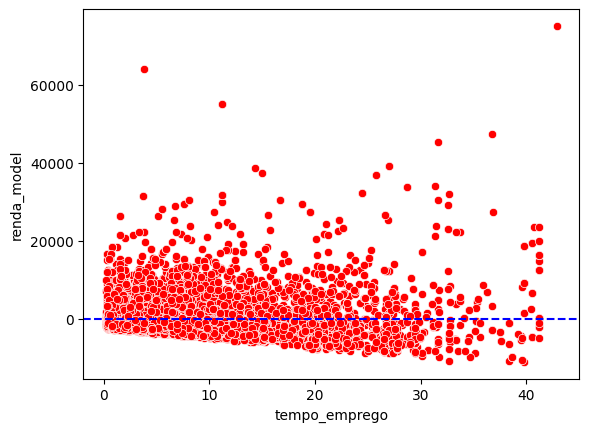

In [181]:
renda_model = smf.ols('renda ~ tempo_emprego', data=renda_csv).fit()
renda_csv['renda_model'] = renda_model.resid

sns.scatterplot(x='tempo_emprego', y='renda_model', data=renda_csv, color='r')
plt.axhline(y=0, color='b', linestyle='--')
plt.show()

In [187]:
renda_csv.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

### First, I will include more variables and analyze how many will be statistically significant.

In [200]:
# before analizy

new_model = smf.ols('renda ~ tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + qt_pessoas_residencia + mau', 
                    data=renda_csv).fit()
renda_csv['new_model'] = new_model.resid
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     406.9
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        11:11:21   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12457   BIC:                         2.443e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  353.2303    259.799      1.360      0.174    -156.016     862.477
sexo[T.M]                 2290.1702     87.751     26.099      0.000    2118.165    2462.175
posse_de_veiculo[T.True]    11.1263     84.728      0.131      0.896    -154.953     177.206
posse_de_imovel[T.True]    431.5882     82.073      5.259      0.000     270.712     592.465
mau[T.True]                 87.6552    253.681      0.346      0.730    -409.598     584.908
tempo_emprego              296.2034      6.110     48.481      0.000     284.228     308.179
qtd_filhos                  24.6480    117.531      0.210      0.834    -205.731     255.027
idade                       25.4320      4.612      5.514      0.000      16.391      34.473
qt_pessoas_residencia       18.5556     98.440      0.188      0.850    -174.402     211.514
==============================================================================
Omnibus:                    10141.611   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439511.053
Skew:                           3.613   Prob(JB):                         0.00
Kurtosis:                      31.177   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

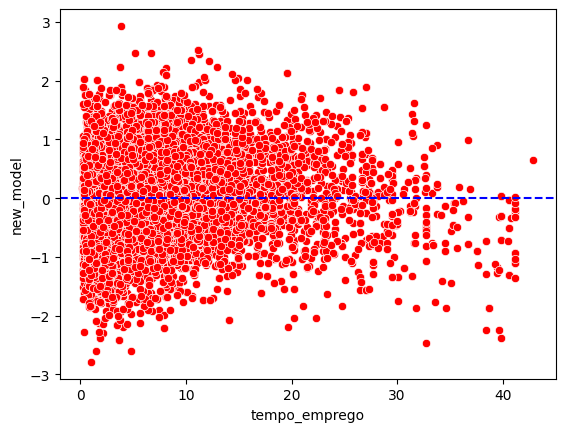

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     794.9
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        11:29:10   Log-Likelihood:                -13513.
No. Observations:               12466   AIC:                         2.704e+04
Df Residuals:                   12461   BIC:                         2.707e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.6634      0.019    410.756      0.000       7.627       7.700
sexo[T.M]                      0.4673      0.014     34.443      0.000       0.441       0.494
posse_de_imovel[T.True]        0.0942      0.014      6.979      0.000       0.068       0.121
np.power(tempo_emprego, 2)     0.0015   3.44e-05     43.695      0.000       0.001       0.002
np.power(idade, 2)          5.909e-05   8.66e-06      6.821      0.000    4.21e-05    7.61e-05
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.233
Skew:                          -0.003   Prob(JB):                        0.540
Kurtosis:                       3.048   Cond. No.                     6.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [256]:
# after analizy, the r-squared is higher with log in renda.

new_model = smf.ols('np.log(renda) ~ np.power(tempo_emprego,2) + sexo + posse_de_imovel + np.power(idade,2)', 
                    data=renda_csv).fit()
renda_csv['new_model'] = new_model.resid

sns.scatterplot(x='tempo_emprego', y='new_model', data=renda_csv, color='r')
plt.axhline(y=0, color='b', linestyle='--')
plt.show()

new_model.summary()

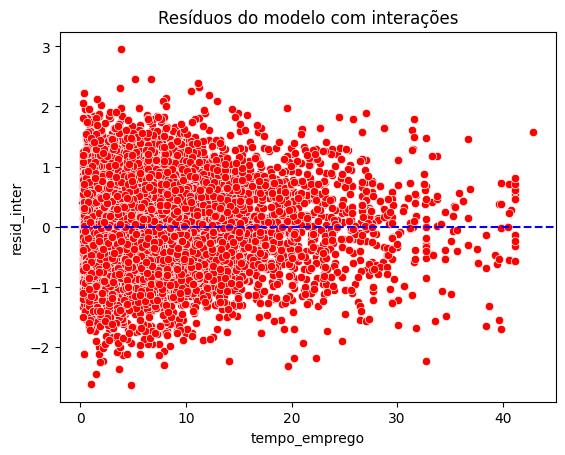

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     521.5
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        11:28:40   Log-Likelihood:                -13327.
No. Observations:               12466   AIC:                         2.667e+04
Df Residuals:                   12458   BIC:                         2.673e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.8083      0.122     63.963      0.000       7.569       8.048
sexo[T.M]                                0.4111      0.059      6.963      0.000       0.295       0.527
posse_de_imovel[T.True]                  0.1234      0.020      6.045      0.000       0.083       0.163
np.power(idade, 2)                       0.0003    6.8e-05      3.740      0.000       0.000       0.000
sexo[F]:idade                           -0.0177      0.006     -3.022      0.003      -0.029      -0.006
sexo[M]:idade                           -0.0161      0.006     -2.821      0.005      -0.027      -0.005
posse_de_imovel[False]:tempo_emprego     0.0499      0.002     29.743      0.000       0.047       0.053
posse_de_imovel[True]:tempo_emprego      0.0472      0.001     39.749      0.000       0.045       0.049
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.360
Skew:                           0.011   Prob(JB):                        0.507
Kurtosis:                       3.046   Cond. No.                     3.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
model_inter = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + \
                       np.power(idade,2) + sexo:idade + posse_de_imovel:tempo_emprego',
                      data=renda_csv).fit()

renda_csv['resid_inter'] = model_inter.resid

sns.scatterplot(x='tempo_emprego', y='resid_inter', data=renda_csv, color='r')
plt.axhline(y=0, color='b', linestyle='--')
plt.title('Resíduos do modelo com interações')
plt.show()

model_inter.summary()